In [1]:
import pandas as pd
from plotnine import *
pd.set_option('display.max_columns', 500)
import numpy as np

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### I'm interested in evaluations (FCE)

How much is the number of evaluations a source has related to poverty or race?

In [25]:
df = pd.read_csv("fce-list-evaluated-with-demographics.csv",dtype={"median_income_dollars":"float"},na_values={"-"})
df.dtypes

date_of_evaluation        object
srn                       object
facility_name             object
address                   object
city                      object
county                    object
district                  object
epa_class                 object
dif                      float64
under_inspected            int64
category_3mo               int64
category_6mo               int64
3mo_text                  object
6mo_text                  object
time_over_under_goal     float64
geoid                    float64
name                     float64
pop_total_onerace        float64
white_total              float64
black_total              float64
pct_white                float64
pct_black                float64
median_income_dollars    float64
dtype: object

In [48]:
df.query('district =="Bay City" and under_inspected == 0')

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif,under_inspected,category_3mo,category_6mo,3mo_text,6mo_text,time_over_under_goal,geoid,name,pop_total_onerace,white_total,black_total,pct_white,pct_black,median_income_dollars
0,2022-03-17,P0789,"KALITTA AIR, LLC",5063 SKYWAY STREET,OSCODA,IOSCO,Bay City,SMOPTOUT,3.47,0,0,0,0: On Time,0: On Time,-1.53,2.606900e+10,1.01,1282.0,1259.0,7.0,98.21,0.55,39115.0
1,2022-02-28,B1991,GM LLC Saginaw Metal Casting Operations,1629 N. WASHINGTON,SAGINAW,SAGINAW,Bay City,MAJOR,1.43,0,0,0,0: On Time,0: On Time,-0.57,2.614500e+10,1.00,608.0,94.0,484.0,15.46,79.61,25357.0
2,2022-02-22,B2644,Hemlock Semiconductor Operations LLC,12334 Geddes Rd.,HEMLOCK,SAGINAW,Bay City,MAJOR,1.93,0,0,0,0: On Time,0: On Time,-0.07,2.614501e+10,120.02,3640.0,3456.0,44.0,94.95,1.21,80119.0
3,2022-02-10,N0854,TI GROUP AUTOMOTIVE SYSTEMS LLC - Caro Test Ce...,628 COLUMBIA ST,CARO,TUSCOLA,Bay City,MAJOR,1.40,0,0,0,0: On Time,0: On Time,-0.60,2.615700e+10,7.00,3121.0,3018.0,38.0,96.70,1.22,55833.0
4,2022-01-27,N1652,West Branch Production Gathering & Compressor ...,2251 SIMMONS RD,WEST BRANCH,OGEMAW,Bay City,SMOPTOUT,3.06,0,0,0,0: On Time,0: On Time,-1.94,2.612995e+10,9505.00,4420.0,4327.0,31.0,97.90,0.70,39926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2009-01-16,B2874,Michigan Sugar Company - Carrollton Factory,341 Sugar,CARROLLTON,SAGINAW,Bay City,MINOR,1.43,0,0,0,0: On Time,0: On Time,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,2009-01-12,B1493,Michigan Sugar Company - Bay City,2600 S Euclid Ave,BAY CITY,BAY,Bay City,MAJOR,1.86,0,0,0,0: On Time,0: On Time,-0.14,2.601729e+10,2855.00,6496.0,6353.0,50.0,97.80,0.77,62241.0
380,2008-12-15,A0224,Holcim (US) Inc. d/b/a Lafarge Essexville Term...,1601 Saline St,ESSEXVILLE,BAY,Bay City,MAJOR,1.22,0,0,0,0: On Time,0: On Time,-0.78,2.601729e+10,2851.00,3171.0,3075.0,44.0,96.97,1.39,59961.0
381,2008-05-07,N5053,USA Jet,3921 Arrow Street,OSCODA,IOSCO,Bay City,SMOPTOUT,1.00,0,0,0,0: On Time,0: On Time,-4.00,2.606900e+10,1.01,1282.0,1259.0,7.0,98.21,0.55,39115.0


# Dhrumil digs around in the data

- 🤔 not much correlation between these, but it does seem like there are some outlier places where there are lots of violations but fewer FCEs. 
- ❓What are these places?

,under_inspected,pct_white,pct_black,median_income_dollars
under_inspected,1.00,0.04,-0.03,-0.01
pct_white,0.04,1.00,-0.89,0.20
pct_black,-0.03,-0.89,1.00,-0.27
median_income_dollars,-0.01,0.20,-0.27,1.00


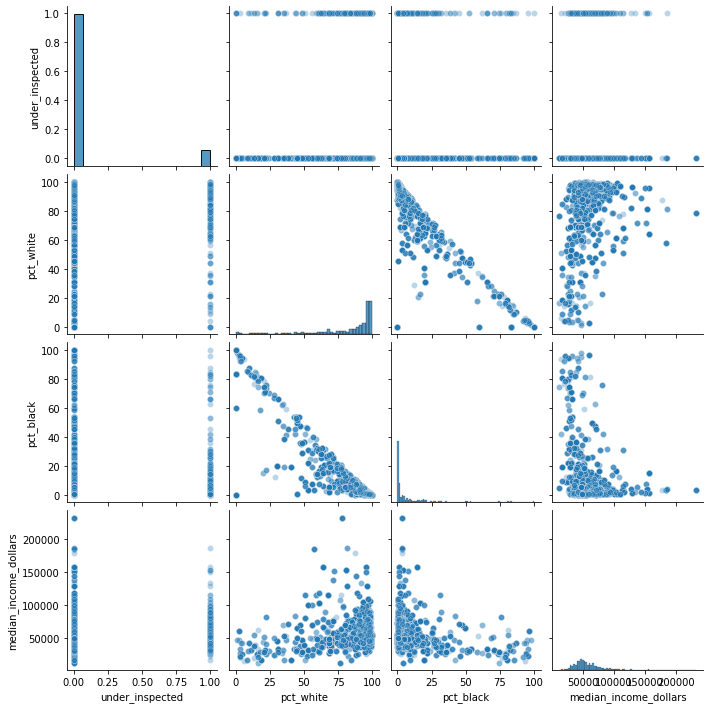

In [26]:
import seaborn as sns

# How related are FCE, VN and SAR to each other
# Ie. do the number of evaluations correlate to the number of violations or activity reports
display(df[['under_inspected', 'pct_white','pct_black', 'median_income_dollars','district']].corr().round(2))
sns.pairplot(df[['under_inspected', 'pct_white', 'pct_black','median_income_dollars','district']], plot_kws={"alpha":0.3})

# Questions
# - what are places with lots of violations and few fces
# - what is the place with 60+ SARs
# - what is the place with 40+ violations and few SARs (and similar places)
# - what are the places with tons of violations





# for later
# - what are places with few inspections and few violations and few SARs?

### Next Question

Where are the places that aren't meeting their fce goals, or places that have a lot of violations?

# Regressions

Asking the same questions with regressions...these help us to see correlations multidimensionally.

dtype('O')

In [49]:
### ODD That a negative relationship shows up -- the longer the permit, the lower the rate of fce_per_year
import statsmodels.formula.api as smf
model = smf.logit("under_inspected ~ district", data=df)
results = model.fit()

display(results.summary())

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
}).sort_values('odds ratio',ascending=False)

display(coefs.round(2))

Optimization terminated successfully.
         Current function value: 0.302223
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        under_inspected   No. Observations:                 5469
Model:                          Logit   Df Residuals:                     5459
Method:                           MLE   Df Model:                            9
Date:                Mon, 16 May 2022   Pseudo R-squ.:                 0.01040
Time:                        14:08:04   Log-Likelihood:                -1652.9
converged:                       True   LL-Null:                       -1670.2
Covariance Type:            nonrobust   LLR p-value:                 6.575e-05
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.8071      0.147    -12.308      0.000      -2.095      -1.519
district[T.Cadillac]        -0.4390      0.208     -2.111      0.035      -0.847      -0.031
district[T.Detroit]         -0.7922      0.214     -3.695      0.000      -1.212      -0.372
district[T.Gaylord]         -0.1939      0.203     -0.956      0.339      -0.591       0.204
district[T.Grand Rapids]    -0.9257      0.209     -4.426      0.000      -1.336      -0.516
district[T.Jackson]         -0.2438      0.223     -1.093      0.274      -0.681       0.193
district[T.Kalamazoo]       -0.3540      0.192     -1.839      0.066      -0.731       0.023
district[T.Lansing]         -0.6329      0.228     -2.782      0.005      -1.079      -0.187
district[T.Marquette]       -0.3220      0.251     -1.283      0.199      -0.814       0.170
district[T.Warren]          -0.6730      0.193     -3.486      0.000      -1.051      -0.295
============================================================================================
"""

,coef,odds ratio,pvalue
district[T.Gaylord],-0.19,0.82,0.34
district[T.Jackson],-0.24,0.78,0.27
district[T.Marquette],-0.32,0.72,0.20
district[T.Kalamazoo],-0.35,0.70,0.07
district[T.Cadillac],-0.44,0.64,0.03
district[T.Lansing],-0.63,0.53,0.01
district[T.Warren],-0.67,0.51,0.00
district[T.Detroit],-0.79,0.45,0.00
district[T.Grand Rapids],-0.93,0.40,0.00
Intercept,-1.81,0.16,0.00


In [43]:
model = smf.ols("time_over_under_goal ~ pct_black", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     time_over_under_goal   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     17.75
Date:                  Mon, 16 May 2022   Prob (F-statistic):           2.56e-05
Time:                          13:44:41   Log-Likelihood:                -8189.4
No. Observations:                  4652   AIC:                         1.638e+04
Df Residuals:                      4650   BIC:                         1.640e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0684      0.023    -45.951      0.000      -1.114      -1.023
pct_black     -0.0046      0.001     -4.213      0.000      -0.007      -0.002
==============================================================================
Omnibus:                      257.220   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.360
Skew:                          -0.582   Prob(JB):                     4.92e-67
Kurtosis:                       3.472   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
np.power(1.07, 10)

1.9671513572895665

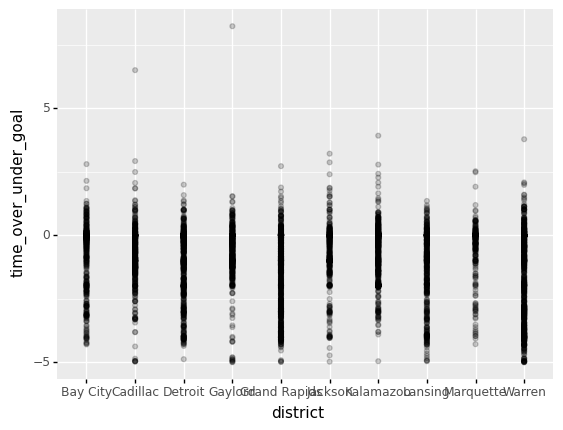

<ggplot: (338018889)>

In [44]:
# back to plots! (but informed by regressions)
display(
    ggplot(df, aes(x='district', y='time_over_under_goal')) + 
        geom_point(alpha=.2)
)

In [38]:
# shelby - are the places with noisier white populations more likely to get inspected

df['over_inspected'] = (df.fce_pct_of_goal > 100).astype('int')
df['under_fce_goal'] = (df.fce_pct_of_goal < 100).astype('int')

import statsmodels.formula.api as smf
model = smf.logit("over_inspected ~ white_pct + total + income_poverty_level", data=df)
results = model.fit()

display(results.summary())

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
})

display(coefs.round(2))

Optimization terminated successfully.
         Current function value: 0.456406
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         over_inspected   No. Observations:                  281
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 May 2022   Pseudo R-squ.:                 0.04711
Time:                        12:45:19   Log-Likelihood:                -128.25
converged:                       True   LL-Null:                       -134.59
Covariance Type:            nonrobust   LLR p-value:                  0.005379
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.0809      1.521     -0.710      0.477      -4.063       1.901
white_pct                0.0013      0.014      0.096      0.923      -0.026       0.028
total                 1.848e-05   1.33e-05      1.388      0.165   -7.62e-06    4.46e-05
income_poverty_level    -0.0633      0.028     -2.274      0.023      -0.118      -0.009
========================================================================================
"""

,coef,odds ratio,pvalue
Intercept,-1.08,0.34,0.48
white_pct,0.00,1.00,0.92
total,0.00,1.00,0.17
income_poverty_level,-0.06,0.94,0.02
